In [3]:
import pandas as pd 
import utils.preprocessing
from utils.test_model import *
from utils.utils import make_submission
import numpy as np

df = pd.read_csv('data/raw/offenseval-training-v1.tsv', sep='\t')
utils.preprocessing.clean(df)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


,id,tweet,subtask_a,subtask_b,subtask_c,clean_tweets,tokens
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,ask nativ american,"[ask, nativ, american]"
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,home drunk manga trump,"[home, drunk, manga, trump]"
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,amazon investig chines employe sell intern dat...,"[amazon, investig, chines, employe, sell, inte..."
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,someon retaken piec shit volcano,"[someon, retaken, piec, shit, volcano]"
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,obama want liber amp illeg move red state,"[obama, want, liber, amp, illeg, move, red, st..."


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

#df = df.dropna(axis=0, subset=['clean_tweets','subtask_c'])
X = df["clean_tweets"]

vec = CountVectorizer(ngram_range=(1,3), 
                      stop_words='english', 
                      max_features=10000)

df_test = pd.read_csv('data/test/task_c/test_set_taskc.tsv', sep='\t')
utils.preprocessing.clean(df_test)

In [47]:
y_train = df["subtask_c"].map({"IND":0, "GRP":1, "OTH":2})


# remove rows with NaN as label in y_train and X then build X_train
(nan_idx,) = np.where(~np.isnan(y_train))
print('Nan proportion (removed): {}%'.format(100*round(1-len(nan_idx) / y_train.shape[0], 4)))

# clean from NaNs ans reset index to prevent errors in testing
y_train = y_train.dropna().reset_index()['subtask_c']
X_new = X.iloc[nan_idx].reset_index()['clean_tweets']

Nan proportion (removed): 70.73%


## Subtask C

In [0]:
X_train = vec.fit_transform(X_new)
X_test = vec.transform(df_test["clean_tweets"])
#y_train = df["subtask_c"].map({"IND":0, "GRP":1, "OTH":2})

### Logistic Regression

In [54]:
acc_scores_logreg = np.zeros(10)
f1_scores_logreg = np.zeros(10)

for i in range(10):
  logreg = LogisticRegression(C=i+1, dual=True)
  print(logreg)
  print('=================================================================')

  # Train Model
  print('=========================== Training ============================')
  logreg.fit(X_train, y_train)

  # Evaluate Model
  print('========================== Evaluating ===========================')
  print('Accuracy:\t{}'.format(round(100*logreg.score(X_train, y_train),4)))

  # K-Fold Cross Validation
  print('========================== Validating ===========================')
  (f1_logreg, acc_logreg) = test_single_model(logreg, X_new, y_train, vec, n_splits=2, random_state=1)
  acc_scores_logreg[i] = acc_logreg
  f1_scores_logreg[i] = f1_logreg
  print('Mean F1 score (3-fold CV):\t{}%'.format(round(100*f1_logreg,4)))
  print('Mean Accuracy (3-fold CV):\t{}%'.format(round(100*acc_logreg,4)))

# Predict on test set and write submission
#y_pred_proba_logreg = logreg.predict_proba(X_test)
#y_pred_logreg = np.argmax(y_pred_proba_logreg,1)
#make_submission(y_pred_logreg, {"UNT":0, "TIN":1}, df_test, "submissions/taskb_logreg.csv")

LogisticRegression(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
=========================== Training ============================
========================== Evaluating ===========================
Accuracy:	93.4985
========================== Validating ===========================


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Mean F1 score (3-fold CV):	45.327%
Mean Accuracy (3-fold CV):	67.5181%
LogisticRegression(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
=========================== Training ============================
========================== Evaluating ===========================
Accuracy:	95.9494
========================== Validating ===========================
Mean F1 score (3-fold CV):	45.55%
Mean Accuracy (3-fold CV):	66.8215%
LogisticRegression(C=3, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
=========================== Training ============================
========================== Evaluating =================

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


========================== Evaluating ===========================
Accuracy:	97.4974
========================== Validating ===========================
Mean F1 score (3-fold CV):	46.058%
Mean Accuracy (3-fold CV):	66.3829%
LogisticRegression(C=5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
=========================== Training ============================
========================== Evaluating ===========================
Accuracy:	97.8328
========================== Validating ===========================
Mean F1 score (3-fold CV):	46.524%
Mean Accuracy (3-fold CV):	66.5893%
LogisticRegression(C=6, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001,

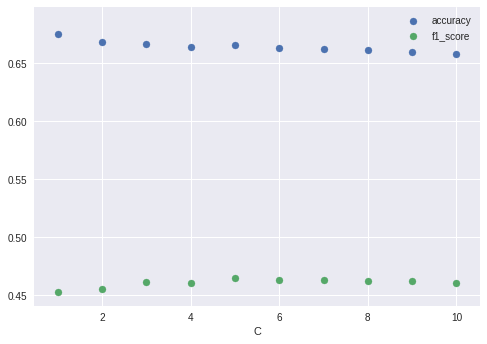

In [59]:
plt.scatter([i+1 for i in range(10)], acc_scores_logreg, label='accuracy')
plt.scatter([i+1 for i in range(10)], f1_scores_logreg, label='f1_score')
plt.legend()
plt.xlabel('C')
plt.savefig('logreg_scores_taskc.png')
plt.show()

### Ridge Regression

In [49]:
acc_scores = np.zeros(20)
f1_scores = np.zeros(20)

for i in range(20):
  alpha = 0.05 * i
  ridgereg = RidgeClassifier(alpha = alpha)
  print(ridgereg)
  print('=================================================================')

  # Train Model
  print('=========================== Training ============================')
  ridgereg.fit(X_train, y_train)

  # Evaluate Model
  print('========================== Evaluating ===========================')
  print('Accuracy:\t{}'.format(round(100*ridgereg.score(X_train, y_train),4)))

  # K-Fold Cross Validation
  print('========================== Validating ===========================')
  (f1_ridgereg, acc_ridgereg) = test_single_model(ridgereg, X_new, y_train, vec, n_splits=3, random_state=1)
  acc_scores[i] = acc_ridgereg
  f1_scores[i] = f1_ridgereg
  print('Mean F1 score (3-fold CV):\t{}%'.format(round(100*f1_ridgereg,4)))
  print('Mean Accuracy (3-fold CV):\t{}%'.format(round(100*acc_ridgereg,4)))


RidgeClassifier(alpha=0.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
=========================== Training ============================
========================== Evaluating ===========================
Accuracy:	98.8906
========================== Validating ===========================
Mean F1 score (3-fold CV):	44.8502%
Mean Accuracy (3-fold CV):	60.8359%
RidgeClassifier(alpha=0.05, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001)
=========================== Training ============================
========================== Evaluating ===========================
Accuracy:	98.839
========================== Validating ===========================
Mean F1 score (3-fold CV):	44.8323%
Mean Accuracy (3-fold CV):	61.1971%
RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
 

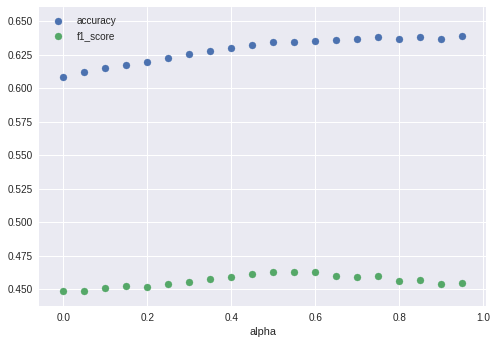

In [60]:
import matplotlib.pyplot as plt

plt.scatter([i*0.05 for i in range(20)], acc_scores, label='accuracy')
plt.scatter([i*0.05 for i in range(20)], f1_scores, label='f1_score')
plt.legend()
plt.xlabel('alpha')
plt.savefig('ridgereg_scores_taskc.png')
plt.show()

### Linear SVC

In [61]:
from sklearn.svm import SVC

svc = SVC(C=4, kernel='sigmoid', shrinking=True, decision_function_shape='ovo', probability=True)
print(svc)
print('=================================================================')

# Train Model
print('=========================== Training ============================')
svc.fit(X_train, y_train)

# Evaluate Model
print('========================== Evaluating ===========================')
print('Accuracy:\t{}'.format(round(100*svc.score(X_train, y_train),4)))

# K-Fold Cross Validation
print('========================== Validating ===========================')
(f1_svc, acc_svc) = test_single_model(svc, X_new, y_train, vec, n_splits=3, random_state=1)
print('Mean F1 score (3-fold CV):\t{}%'.format(round(100*f1_svc,4)))
print('Mean Accuracy (3-fold CV):\t{}%'.format(round(100*acc_svc,4)))

# Predict on test set and write submission
#y_pred_proba_svc = svc.predict_proba(X_test)
#y_pred_svc = np.argmax(y_pred_proba_svc,1)
#make_submission(y_pred_svc, {"UNT":0, "TIN":1}, df_test, "submissions/taskb_svc.csv")

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
=========================== Training ============================


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


========================== Evaluating ===========================
Accuracy:	62.1001
========================== Validating ===========================


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean F1 score (3-fold CV):	25.5383%
Mean Accuracy (3-fold CV):	62.1001%


### Random Forest

In [0]:
from scipy.sparse import hstack

word_vec = CountVectorizer(ngram_range=(1,3), stop_words='english',analyzer='word', max_features=32500)
train_word_features = word_vec.fit_transform(X_new)
test_word_features = word_vec.fit_transform(df_test["clean_tweets"])

char_vec = CountVectorizer(ngram_range=(1,3), stop_words='english',analyzer='char', max_features=32500)
train_char_features = char_vec.fit_transform(X_new)
test_char_features = char_vec.fit_transform(df_test["clean_tweets"])

train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

In [63]:
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=100, max_features=1000, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

print(rfc)
print('=================================================================')

# Train Model
print('=========================== Training ============================')
rfc.fit(train_features, y_train)

# Evaluate Model
print('========================== Evaluating ===========================')
print('Accuracy:\t{}'.format(round(100*rfc.score(train_features, y_train),4)))

# K-Fold Cross Validation
print('========================== Validating ===========================')
(f1_rfc, acc_rfc) = test_single_model(rfc, X_new, y_train, [word_vec, char_vec], 
                                      n_splits=3, random_state=1)
print('Mean F1 score (3-fold CV):\t{}%'.format(round(100*f1_rfc,4)))
print('Mean Accuracy (3-fold CV):\t{}%'.format(round(100*acc_rfc,4)))

# Predict on test set and write submission
#y_pred_proba_rfc = rfc.predict_proba(X_test)
#y_pred_rfc = np.argmax(y_pred_proba_rfc,1)
#make_submission(y_pred_rfc, {"UNT":0, "TIN":1}, df_test, "submissions/taskb_rfc.csv")

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=100, max_features=1000,
            max_leaf_nodes=50, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
=========================== Training ============================
========================== Evaluating ===========================
Accuracy:	69.0144
========================== Validating ===========================
Mean F1 score (3-fold CV):	46.1781%
Mean Accuracy (3-fold CV):	59.9071%


### CNN

In [0]:
from keras.utils import to_categorical
from keras.preprocessing import sequence
from utils.keras_utils import f1_loss
from keras.models import Sequential
from keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalMaxPool1D, Dropout, Dense
from keras.preprocessing import text
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding


tokenizer = text.Tokenizer(num_words=15000)
tokenizer.fit_on_texts(X_new)

X_test = df_test["clean_tweets"]
list_tokenized_train = tokenizer.texts_to_sequences(X_new)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

y_cat = to_categorical(y_train)

X_tr = sequence.pad_sequences(list_tokenized_train, maxlen=100)
X_te = sequence.pad_sequences(list_tokenized_test, maxlen=100)

In [65]:
# Define Model
cnn = Sequential()
cnn.add(Embedding(15000, 16, input_length=100))
cnn.add(Conv1D(16, 4, activation='relu'))
cnn.add(MaxPooling1D(4))
cnn.add(Flatten())
cnn.add(Dropout(rate=0.25))
cnn.add(Dense(units=16, activation='relu'))
cnn.add(Dropout(rate=0.15))
cnn.add(Dense(units=8, activation='relu'))
cnn.add(Dense(units=3, activation='softmax'))
cnn.compile(loss=f1_loss, optimizer='adam', metrics=['accuracy'])
print(cnn.summary())
print('=================================================================')

# Train Model
print('=========================== Training ============================')
cnn.fit(X_tr, y_cat, epochs=20,  batch_size=64, verbose=False)

# Evaluate Model
print('========================== Evaluating ===========================')
evaluation_cnn = cnn.evaluate(X_tr, y_cat, batch_size=64, verbose=1)
print('{}:\t{}'.format(cnn.metrics_names[0], round(100*evaluation_cnn[0],4)))
print('{}:\t{}%'.format(cnn.metrics_names[1], round(100*evaluation_cnn[1],4)))

# K-Fold Cross Validation
print('========================== Validating ===========================')
(f1_cnn, acc_cnn) = test_single_model(cnn, X_new, y_train, tokenizer, epochs=10,
                                      n_splits=3, random_state=1, verbose=False)
print('Mean F1 score (3-fold CV):\t{}%'.format(round(100*f1_cnn,4)))
print('Mean Accuracy (3-fold CV):\t{}%'.format(round(100*acc_cnn,4)))

# Predict on test set and write submission
#y_pred_proba_cnn = cnn.predict(X_te)
#y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
#make_submission(y_pred_cnn, {"UNT":0, "TIN":1}, df_test, "submissions/taskb_cnn.csv")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           240000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 97, 16)            1040      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)      

### LSTM

In [68]:
# Define Model
lstm = Sequential()
lstm.add(Embedding(15000, 32, input_length=100))
lstm.add(Bidirectional(LSTM(16, return_sequences=True)))
lstm.add(GlobalMaxPool1D())
lstm.add(Dropout(0.3))
lstm.add(Dense(8, activation="relu"))
lstm.add(Dense(3, activation="softmax"))
lstm.compile(loss=f1_loss, optimizer='adam', metrics=['accuracy'])
print(lstm.summary())
print('=================================================================')

# Train Model
print('=========================== Training ============================')
lstm.fit(X_tr, y_cat, epochs=10,  batch_size=64, verbose=False)

# Evaluate Model
print('========================== Evaluating ===========================')
evaluation_lstm = lstm.evaluate(X_tr, y_cat, batch_size=64, verbose=1)
print('{}:\t{}'.format(lstm.metrics_names[0], round(100*evaluation_lstm[0],4)))
print('{}:\t{}%'.format(lstm.metrics_names[1], round(100*evaluation_lstm[1],4)))

# K-Fold Cross Validation
print('========================== Validating ===========================')
test_single_model(lstm, X_new, y_train, tokenizer, n_splits=3, random_state=1, verbose=False)
(f1_lstm, acc_lstm) = test_single_model(lstm, X_new, y_train, tokenizer, 
                                        n_splits=3, random_state=1, verbose=False)
print('Mean F1 score (3-fold CV):\t{}%'.format(round(100*f1_lstm,4)))
print('Mean Accuracy (3-fold CV):\t{}%'.format(round(100*acc_lstm,4)))

# Predict on test set and write submission
#y_pred_proba_lstm = lstm.predict(X_te)
#y_pred_lstm = np.argmax(y_pred_proba_lstm, axis=1)
#make_submission(y_pred_lstm, {"UNT":0, "TIN":1}, df_test, "submissions/taskb_lstm.csv")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 32)           6272      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 326,563
Trainable params: 326,563
Non-trainable params: 0
_________________________________________________________________
None

### Bi-LSTM + Conv Layer

In [67]:
blc = Sequential()
blc.add(Embedding(15000, 16, input_length=100, trainable=True))
blc.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.15, recurrent_dropout=0.15)))
blc.add(Conv1D(16, kernel_size=4, padding='valid', kernel_initializer='glorot_uniform'))
blc.add(GlobalMaxPool1D())
blc.add(Dropout(0.15))
blc.add(Dense(8, activation='relu'))
blc.add(Dense(3, activation='softmax'))
blc.compile(loss=f1_loss, optimizer='adam', metrics=['accuracy'])
print(blc.summary())
print('=================================================================')

# Train Model
print('=========================== Training ============================')
blc.fit(X_tr, y_cat, epochs=4,  batch_size=64, verbose=False)

# Evaluate Model
print('========================== Evaluating ===========================')
evaluation_blc = blc.evaluate(X_tr, y_cat, batch_size=64, verbose=1)
print('{}:\t{}'.format(blc.metrics_names[0], round(100*evaluation_blc[0],4)))
print('{}:\t{}%'.format(blc.metrics_names[1], round(100*evaluation_blc[1],4)))

# K-Fold Cross Validation
print('========================== Validating ===========================')
test_single_model(blc, X_new, y_train, tokenizer, n_splits=3, random_state=1, verbose=False)
(f1_blc, acc_blc) = test_single_model(blc, X_new, y_train, tokenizer, 
                                      n_splits=3, random_state=1, verbose=False)
print('Mean F1 score (3-fold CV):\t{}%'.format(round(100*f1_blc,4)))
print('Mean Accuracy (3-fold CV):\t{}%'.format(round(100*acc_blc,4)))

# Predict on test set and write submission
#y_pred_proba_blc = blc.predict(X_te)
#y_pred_blc = np.argmax(y_pred_proba_blc, axis=1)
#make_submission(y_pred_blc, {"UNT":0, "TIN":1}, df_test, "submissions/taskb_blc.csv")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           240000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 32)           4224      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 97, 16)            2064      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total para